<a href="https://colab.research.google.com/github/Sirius724/Computational-Physics/blob/main/%EC%A0%84%EC%82%B0%EB%AC%BC%EB%A6%AC%ED%95%99_4_First_order_differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/전산 물리학"
data = "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data"
import os
import numpy as np ; import math as mt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.isdir(data): 
    os.makedirs(data)

Mounted at /content/drive


## Euler method


### Solve follow as diffential equation

$${dy \over dx} = {y \over x} + x^2 $$

In [ ]:
import math as mt
import numpy as np
import os

dx = 1 # 계산 간격 지정
X = np.arange(1,51,dx) # x 좌표 범위 지정
Y, fx = np.zeros(len(X)),np.zeros(len(X)) # Y, fx 값 리스트 생성

Y[0] = 1 # Y값의 초기 설정

save = open(f"{data}/Euler.txt","w+")

def f(x,y): # 미분 방정식 대입
    fx1 = y/x+x**2
    return fx1

def exact(x): # 해석적 결과 비교 함수
    ex = (pow(x,3)+x)/2.0
    return ex


fx[0] = exact(X[0])
save.write(f"{X[0]:.4f}\t{Y[0]:.4f}\t{fx[0]:.4f}\n")
for i in range(len(X)-1): # Euler equation
    Y[i+1]=(Y[i]+f(X[i],Y[i])*dx)
    fx[i+1]=exact(X[i+1])
    save.write(f"{X[i+1]:.4f}\t{Y[i+1]:.4f}\t{fx[i+1]:.4f}\n")

save.close()

## 2nd-order Runge-Kutta method

In [ ]:
dx = 1
X = np.arange(1,51,dx)
Y,F = np.zeros(len(X)), np.zeros(len(X))

def exact(x):
    ex = (pow(x,3)+x)/2.0
    return ex

def f(x,y): # 미분 방정식 대입
    fx1 = y/x+x**2
    return fx1

Y[0]=1.0
F[0]=f(X[0],Y[0])

save = open(f"{data}/runge_2nd.txt","w+")
save.write(f"{X[0]:.4f}\t{Y[0]:.4f}\t{F[0]:.4f}\n")

for i in range(len(X)-1):
    k1 = dx*f(X[i],Y[i]) # k1 =dx*f(xn,yn)
    k2 = dx*f(X[i+1],Y[i]+dx) # k2 = dx*f(xn+dx,yn+k1)
    Y[i+1]= Y[i]+(k1+k2)/2.0 
    F[i+1]=exact(X[i+1])
    save.write(f"{X[i+1]:.4f}\t{Y[i+1]:.4f}\t{F[i+1]:.4f}\n")
    
save.close()

## 4th-order Runge-Kutta method

In [ ]:
dx = 1
X = np.arange(1,51,dx)
Y,F = np.zeros(len(X)), np.zeros(len(X))

def exact(x):
    ex = (pow(x,3)+x)/2.0
    return ex

def f(x,y): # 미분 방정식 대입
    fx1 = y/x+x**2
    return fx1

Y[0]=1.0
F[0]=exact(X[0])

save = open(f"{data}/runge_4th.txt","w+")
save.write(f"{X[0]:.4f}\t{Y[0]:.4f}\t{F[0]:.4f}\n")
for i in range(len(X)-1):
    k1 = dx*f(X[i],Y[i]) # k1 = dx*f(xn,yn)
    k2 = dx*f(X[i]+dx/2,Y[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    k3 = dx*f(X[i]+dx/2,Y[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    k4 = dx*f(X[i]+dx,Y[i]+k3) # k4 = dx * f(xn+dx,yn+k3)
    Y[i+1]= Y[i]+(k1+2*k2+2*k3+k4)/6
    F[i+1]=exact(X[i+1])
    save.write(f"{X[i+1]:.4f}\t{Y[i+1]:.4f}\t{F[i+1]:.4f}\n")    

save.close()

### Graph drawing
- Using Matplotlib, Pandas library

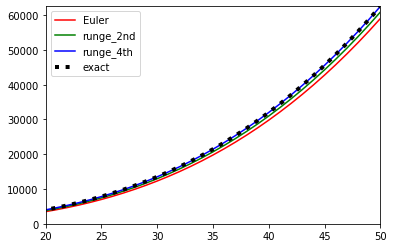

In [ ]:
import pandas as pd
Euler = pd.read_csv("%s/Euler.txt"%data, sep='\t',header=None,engine="python")
runge_2nd = pd.read_csv("%s/runge_2nd.txt"%data, sep='\t',header=None,engine="python")
runge_4th = pd.read_csv("%s/runge_4th.txt"%data, sep='\t',header=None,engine="python")
#print(text_test)
%matplotlib inline

plt.xlim(20,50); plt.ylim(0,Euler[2][len(Euler[1])-1])
plt.plot(Euler[0],Euler[1],label = "Euler",c='r')
plt.plot(runge_2nd[0],runge_2nd[1],label = "runge_2nd",c="g")
plt.plot(runge_4th[0],runge_4th[1],label = "runge_4th",c="b")
plt.plot(Euler[0],Euler[2], label = "exact",linestyle="dotted",c="black", linewidth=4)
plt.legend()

$${dy \over dx } = {2\over x}y +{1\over x^3} $$

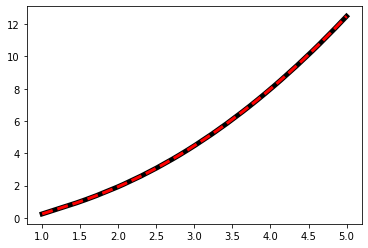

In [ ]:
import math as mt
import numpy as np
import os

dx = 1/1000 # 계산 간격 지정
X = np.arange(1,5,dx) # x 좌표 범위 지정
Y,F = np.zeros(len(X)), np.zeros(len(X)) 

Y[0] = 1/4 # Y값의 초기 설정

def f(x,y): # 미분 방정식 대입
    fx1 = 2/x*y + 1/x**3
    return fx1

def exact(x): # 해석적 결과 비교 함수
    ex = -1/4*x**-2 + 1/2*x**2
    return ex

for i in range(len(X)-1): # Euler equation
    Y[i+1]=(Y[i]+f(X[i],Y[i])*dx)

for i in range(len(X)): # 해석적 fx 값 구하기
    F[i]= exact(X[i])

save = open(f"{data}/Euler method.txt","w+")

for i in range(len(X)):
    save.write(f"{X[i]:.4f}\t{Y[i]:.4f}\t{F[i]:.4f}\n")

save.close()

import pandas as pd
text_test = pd.read_csv("%s/Euler method.txt"%data, sep='\t',header=None,engine="python")
#print(text_test)
%matplotlib inline
plt.plot(text_test[0],text_test[1], c = "black",linewidth = 5)
plt.plot(text_test[0],text_test[2], linestyle = "dashed", c = "r", linewidth = 3)

## A system of first-order differential equation
### 이거는 그냥 코드 적어놓기만 실제 함수는 찾아보고.........

In [ ]:
# Using Runge-kutta 4th order

dx = 1
X = np.arange(1,51,dx)
Y,Z = np.zeros(len(X)), np.zeros(len(X))

def exact(x,y,z): # Analystic exact function
    ex = (pow(x,3)+x)/2.0  
    return ex

def f(x,y,z): # 미분 방정식 대입
    fx = y/x+x**2
    return fx

def g(x,y,z): # 미분 방정식 대입
    gx = y/x+x**2
    return gx

Y[0]= # y initial state  
Z[0]= # z initial state

save = open(f"{data}/runge_4th.txt","w+")
save.write(f"{X[0]:.4f}\t{Y[0]:.4f}\t{Z[0]:.4f}\n")

for i in range(len(X)-1):
    k1 = dx*f(X[i],Y[i],Z[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dx*g(X[i],Y[i],Z[i]) # l1 = dx*f(xn,yn,zn)
    k2 = dx*f(X[i]+dx/2,Y[i]+k1/2,Z[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dx*g(X[i]+dx/2,Y[i]+k1/2,Z[i]+l1/2) # l2 = dx *g(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dx*f(X[i]+dx/2,Y[i]+k2/2,Z[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dx*g(X[i]+dx/2,Y[i]+k2/2,Z[i]+l2/2) # l3 = dx *g(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dx*f(X[i]+dx,Y[i]+k3,Z[i]+l3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dx*g(X[i]+dx,Y[i]+k3,Z[i]+l3) # l4 = dx * g(xn+dx,yn+k3,zn+l3)
    Y[i+1]= Y[i]+(k1+2*k2+2*k3+k4)/6
    Z[i+1]= Z[i]+(l1+2*l2+2*l3+l4)/6
    save.write(f"{X[i+1]:.4f}\t{Y[i+1]:.4f}\t{Z[i+1]:.4f}\n")    

save.close()

## Terminal Velocity

In [143]:
dt = 1/50
t = np.arange(0,1,dt)
x,v = np.zeros(len(t)), np.zeros(len(t)) #Runge-Kutta
x2,v2 = np.zeros(len(t)), np.zeros(len(t)) #Euler
ex = np.zeros(len(t)) #Exact value
m = 0.01
mu = 0.05
g = 9.8
v[0] = v2[0] = ex[0]=20
x[0] = x2[0] = 0


def exact(t): # Analystic exact function
    ext = (ex[0]+0.01*9.8/0.05)*mt.exp(-0.05/0.01*t)-0.01*9.8/0.05  
    return ext

def f(t,x,v): #x에 대한 식
    fx = v
    return fx

def g(t,x,v): # v에 대한 식
    gx = -9.8-0.05/0.01*v
    return gx

save = open(f"{data}/velocity.txt","w+")
save.write(f"{t[0]:.4f}\t{x[0]:.4f}\t{v[0]:.4f}\t{x2[0]:.4f}\t{v2[0]:.4f}\t{ex[0]:.4f}\n")    


for i in range(len(t)-1):
    k1 = dt*f(t[i],x[i],v[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*g(t[i],x[i],v[i]) # l1 = dx*f(xn,yn,zn)
    k2 = dt*f(t[i]+dt/2,x[i]+k1/2,v[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*g(t[i]+dt/2,x[i]+k1/2,v[i]+l1/2) # l2 = dx *g(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*f(t[i]+dt/2,x[i]+k2/2,v[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*g(t[i]+dt/2,x[i]+k2/2,v[i]+l2/2) # l3 = dx *g(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*f(t[i]+dt,x[i]+k3,v[i]+l3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*g(t[i]+dt,x[i]+k3,v[i]+l3) # l4 = dx * g(xn+dx,yn+k3,zn+l3)
    x[i+1]= x[i]+(k1+2*k2+2*k3+k4)/6
    v[i+1]= v[i]+(l1+2*l2+2*l3+l4)/6   
    x2[i+1]= x2[i]+v2[i]*dt
    v2[i+1]= v2[i]-(9.8+0.05/0.01*v2[i])*dt
    ex[i+1] = exact(t[i+1])
    save.write(f"{t[i+1]:.4f}\t{x[i+1]:.4f}\t{v[i+1]:.4f}\t{x2[i+1]:.4f}\t{v2[i+1]:.4f}\t{ex[i+1]:.4f}\n")    

save.close()


(-1.7965, 20.0)

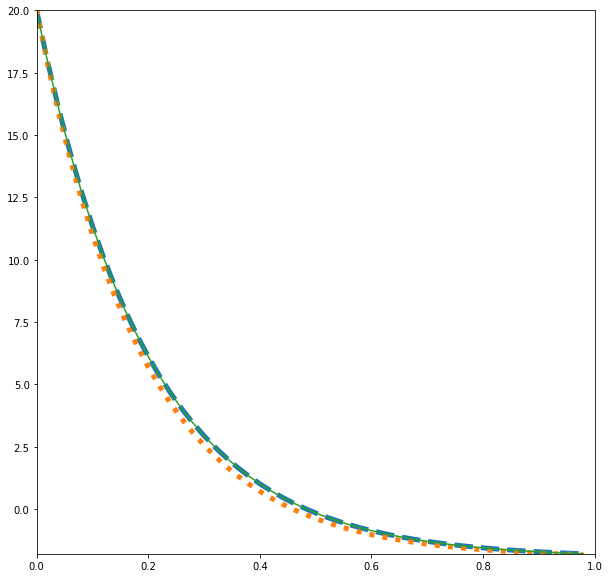

In [144]:
import pandas as pd
v_data = pd.read_csv("%s/velocity.txt"%data, sep='\t',header=None,engine="python")

plt.figure(figsize=(10,10))
plt.plot(v_data[0],v_data[2],linestyle="dashed",linewidth=5)
plt.plot(v_data[0],v_data[4],linestyle="dotted",linewidth=5)
plt.plot(v_data[0],v_data[5])
plt.xlim(0,1)
plt.ylim(v_data[5].min(),v_data[5].max())